erro quadrado 225 está errado 15 minutos

erro mais de 2000 vai ser complicado

plotar histograma predito menos real

transformar em categoricas 

usar o do pandas 

holiday já tem

In [19]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../data/flights2.csv')

In [21]:
df.head().to_markdown()

'|    |   flight_id | airline   | aircraft_type   | schengen     | origin   |   arrival_time |   departure_time |   day |   year | is_holiday   |    delay |\n|---:|------------:|:----------|:----------------|:-------------|:---------|---------------:|-----------------:|------:|-------:|:-------------|---------:|\n|  0 |          22 | FP        | Boeing 787      | schengen     | PFL      |        19.3802 |          21.3802 |     0 |   2010 | False        | 68.2377  |\n|  1 |          13 | MN        | Boeing 787      | schengen     | WGU      |         8.901  |          11.901  |     0 |   2010 | False        | 12.6384  |\n|  2 |          29 | FP        | Boeing 777      | schengen     | BFE      |        17.6766 |          21.6766 |     0 |   2010 | False        | 58.9897  |\n|  3 |          11 | MN        | Airbus A320     | non-schengen | YEY      |        10.0838 |          12.0838 |     0 |   2010 | False        |  3.98979 |\n|  4 |          22 | FP        | Boeing 787      | scheng

In [22]:
df.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.489793,14.635683,17.503080,182.000000,2016.000000,9.020764
std,8.666931,4.260378,4.531364,105.366769,3.741684,24.455997
min,1.000000,7.128012,9.772546,0.000000,2010.000000,-66.362959
25%,8.000000,9.995541,12.083809,91.000000,2013.000000,-8.561869
50%,16.000000,16.917395,19.697226,182.000000,2016.000000,6.333424
75%,23.000000,18.034396,21.328963,273.000000,2019.000000,24.659202
max,30.000000,19.812748,23.812748,364.000000,2022.000000,129.672097


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [24]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 71175
Number of columns: 11


In [25]:
# Function to convert decimal time to hours and minutes
def convert_decimal_to_time(decimal_time):
    hours = int(decimal_time)
    minutes = int((decimal_time - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

# Convert arrival time column
df['arrival_time'] = df['arrival_time'].apply(convert_decimal_to_time)

# Convert departure time column
df['departure_time'] = df['departure_time'].apply(convert_decimal_to_time)

# Display the updated DataFrame
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,22,FP,Boeing 787,schengen,PFL,19:22,21:22,0,2010,False,68.237741
1,13,MN,Boeing 787,schengen,WGU,08:54,11:54,0,2010,False,12.638385
2,29,FP,Boeing 777,schengen,BFE,17:40,21:40,0,2010,False,58.989720
3,11,MN,Airbus A320,non-schengen,YEY,10:05,12:05,0,2010,False,3.989793
4,22,FP,Boeing 787,schengen,PFL,19:22,21:22,0,2010,False,69.832144


In [26]:
# Function to convert day and year to a regular date
def convert_day_to_date(day, year):
    base_date = datetime(year=year, month=1, day=1)
    target_date = base_date + timedelta(days=day)
    return target_date.strftime('%Y-%m-%d')  # Format the date as desired

# Convert 'day' column to regular dates
df['date'] = df.apply(lambda row: convert_day_to_date(row['day'], row['year']), axis=1)

# Display the updated DataFrame
df.head()


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,22,FP,Boeing 787,schengen,PFL,19:22,21:22,0,2010,False,68.237741,2010-01-01
1,13,MN,Boeing 787,schengen,WGU,08:54,11:54,0,2010,False,12.638385,2010-01-01
2,29,FP,Boeing 777,schengen,BFE,17:40,21:40,0,2010,False,58.989720,2010-01-01
3,11,MN,Airbus A320,non-schengen,YEY,10:05,12:05,0,2010,False,3.989793,2010-01-01
4,22,FP,Boeing 787,schengen,PFL,19:22,21:22,0,2010,False,69.832144,2010-01-01


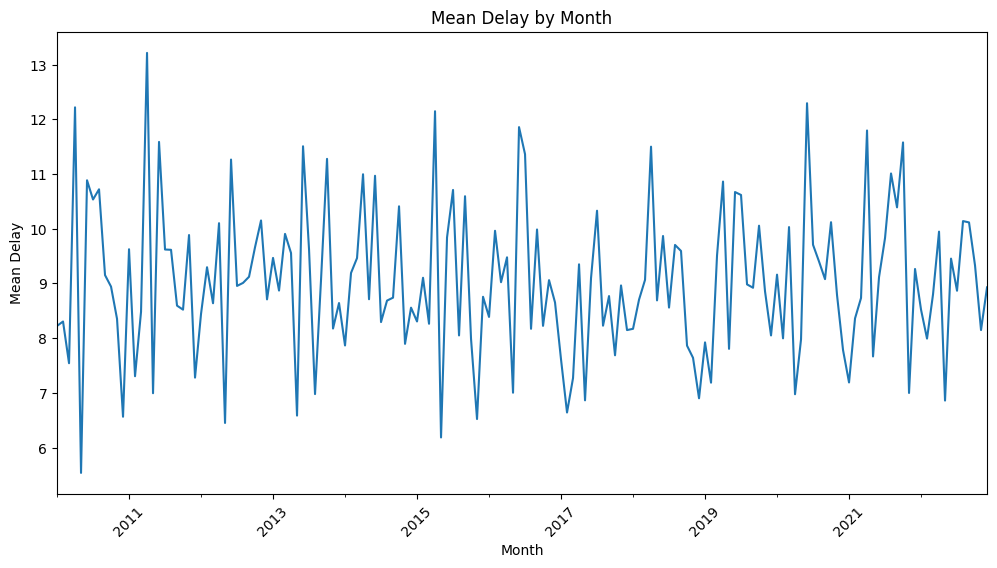

In [27]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by month and calculate the mean delay
mean_delay_by_month = df.groupby(df['date'].dt.to_period('M'))['delay'].mean()

# Create the graph
plt.figure(figsize=(12, 6))
mean_delay_by_month.plot(kind='line')
plt.title('Mean Delay by Month')
plt.xlabel('Month')
plt.ylabel('Mean Delay')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

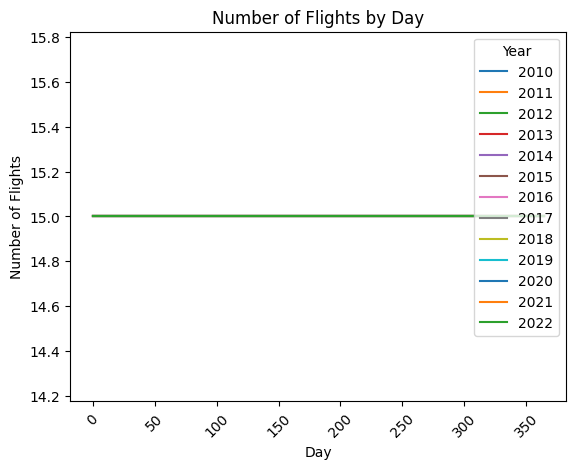

In [28]:
# Group the data by year and day, and calculate the count of flights
flight_count_by_year_day = df.groupby(['year', 'day'])['flight_id'].count().unstack('year')

# Create the graph
plt.figure(figsize=(12, 6))
flight_count_by_year_day.plot(kind='line')
plt.title('Number of Flights by Day')
plt.xlabel('Day')
plt.ylabel('Number of Flights')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

In [29]:
import seaborn as sns

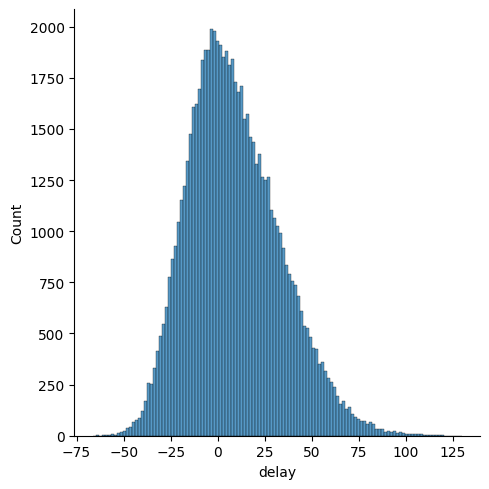

In [30]:
#plot a histogram of the delay column
sns.displot(df['delay'])

<Axes: xlabel='airline', ylabel='count'>

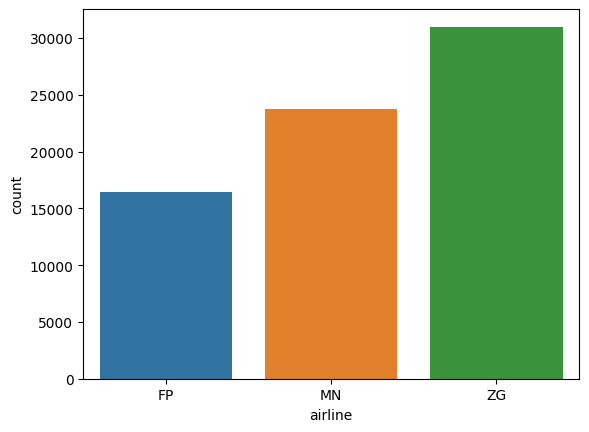

In [31]:
#plot amouth of flights by airline
sns.countplot(x='airline', data=df)

<Axes: xlabel='origin', ylabel='count'>

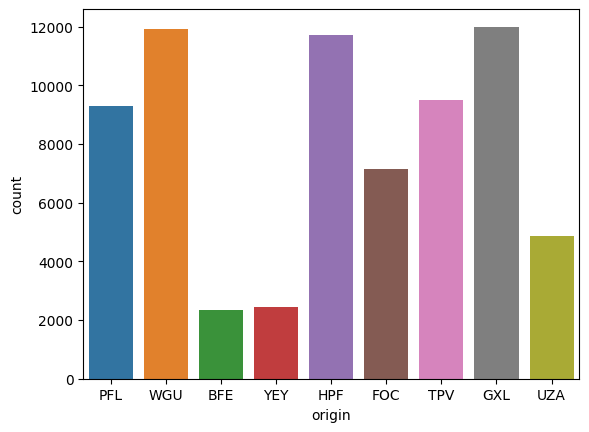

In [32]:
#plot amouth of flights by origin
sns.countplot(x='origin', data=df)

In [33]:
df['schengen'].value_counts(normalize=True)

schengen
schengen        0.897984
non-schengen    0.102016
Name: proportion, dtype: float64

<Axes: xlabel='schengen', ylabel='count'>

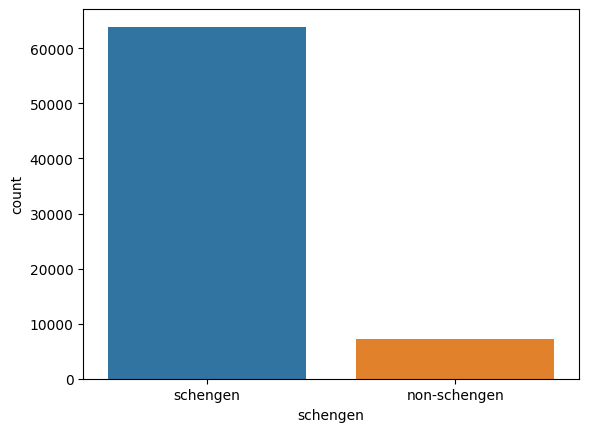

In [34]:
#plot amout of flights schengen and non-schengen
sns.countplot(x='schengen', data=df)

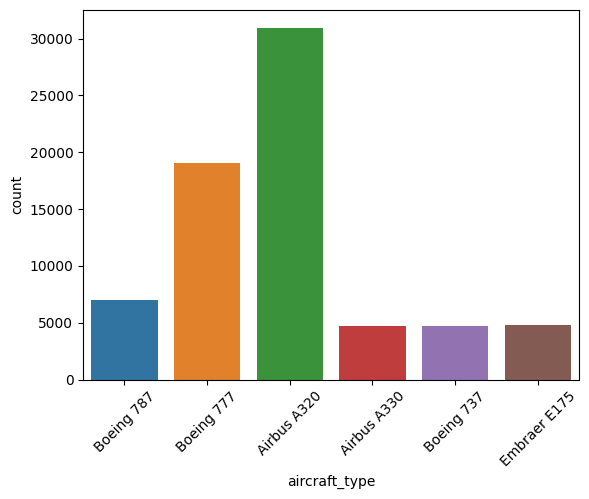

In [35]:
#plot amount of flights by aircraft type
sns.countplot(x='aircraft_type', data=df)
#rotate x axis labels
plt.xticks(rotation=45)
plt.show()